## Finding correlation between gross income for movies and other factors

### Hypothesis: Expecting high correlation between gross income and budget, company.

In [192]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
plt.rcParams['figure.figsize']=(12,8) # Adjusts configuration of the plots created 



In [219]:
df=pd.read_csv(r'C:\Users\dhill\Desktop\SQL\Projects\Python\movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [224]:
# Looking for empty columns
for col in df.columns:
    percent_missing=np.mean(df[col].isnull())
    print('{} - {}%'.format(col,percent_missing))
df= df.dropna()

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [218]:
df.dtypes

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget           int64
gross            int64
company         object
runtime        float64
correctyear     object
dtype: object

In [196]:
# Change null values to 0
df['budget']=df['budget'].fillna(0)
df['gross']=df['gross'].fillna(0)      
    

In [197]:
# Change data type of budget colunmn as integer  
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')

In [225]:
#Create a correct year column 

# Option 1

mylist=[]   
count=1
for i in df['released'].astype(str).str.split(','):
# catching row numbers for entries with incorrect date formats
    try: 
        count+=1
        n=i[1][:5]
        mylist.append(n)
    except IndexError:
        print("The syntax for the date is incorrect at row: "+str(count))
        lst.append(count)
        pass
mylist
df['correctyear']=mylist

# Option 2

df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [226]:
df.sort_values(by=['gross'],inplace=False,ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018,2018


In [201]:
pd.set_option('display.max_rows',None)

In [230]:
# Visualising all production houses
df['company'].drop_duplicates().sort_values(ascending=False).head(25)

7129                                thefyzz
5664                            micro_scope
4007                               i5 Films
6793                             i am OTHER
6420                                   erbp
3776                         double A Films
3330            Zucker Brothers Productions
146                        Zoetrope Studios
2213                     Zeta Entertainment
3698                Zentropa Entertainments
1180                   Zenith Entertainment
5180                        Zazen Produções
1321               Zanuck/Brown Productions
1329            Zacharias-Buhai Productions
789               Young Sung Production Co.
5125             Young Hannibal Productions
5499                            Yellow Bird
4618                         Yash Raj Films
4990              Yari Film Group Releasing
5410                  Yari Film Group (YFG)
5583                  X-Filme Creative Pool
6265                Worldview Entertainment
4392            World of Wonder 

<function matplotlib.pyplot.show(close=None, block=None)>

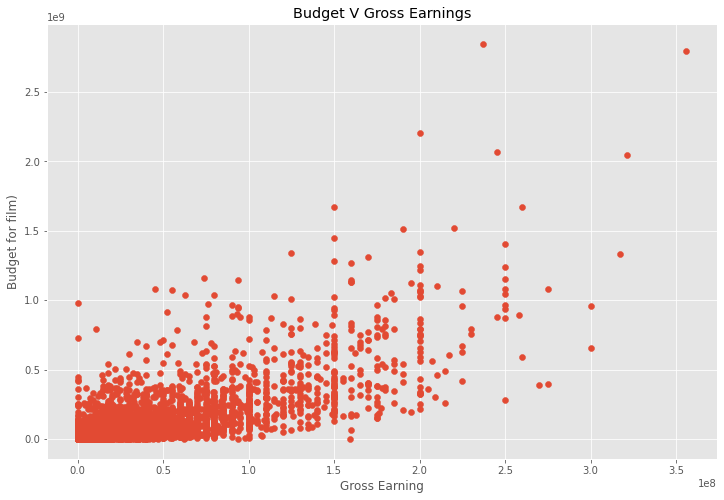

In [204]:
# Scatter plot for budget vs gross
plt.scatter (x=df['budget'],y=df['gross'])
plt.title('Budget V Gross Earnings')
plt.xlabel("Gross Earning")
plt.ylabel("Budget for film)")
plt.show

<AxesSubplot:xlabel='budget', ylabel='gross'>

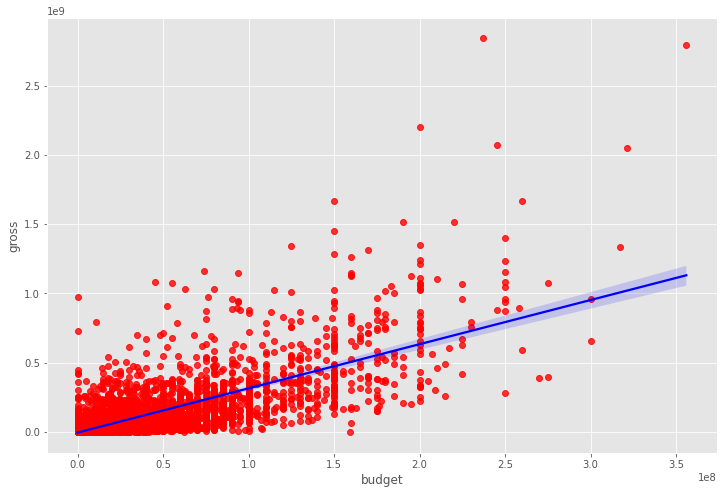

In [205]:
#plot budget vs gross using seaborn for regression plot

sns.regplot(x='budget', y='gross',data=df,scatter_kws={"color":"red"},line_kws={"color":'blue'})

In [206]:
#Looking at correlation
#correlatin methods: pearson, kendall, spearman
df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


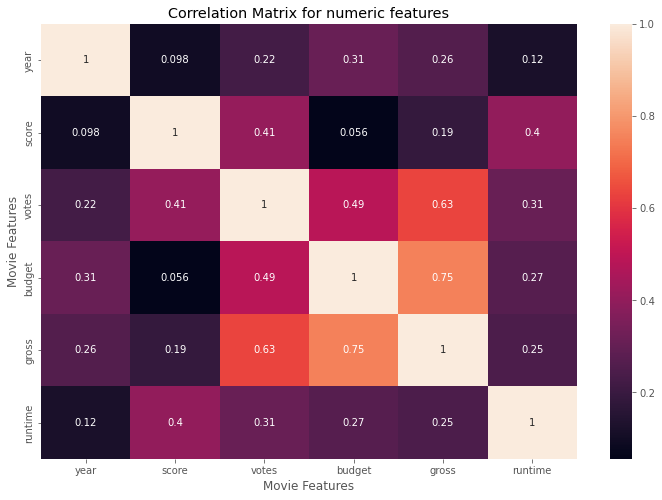

In [207]:
#Visualising correlation using heatmap
correlation_matrix=df.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix for numeric features')
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [209]:
df.dtypes

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget           int64
gross            int64
company         object
runtime        float64
correctyear     object
dtype: object

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         7668 non-null   object 
 1   rating       7591 non-null   object 
 2   genre        7668 non-null   object 
 3   year         7668 non-null   int64  
 4   released     7668 non-null   object 
 5   score        7665 non-null   float64
 6   votes        7665 non-null   float64
 7   director     7668 non-null   object 
 8   writer       7665 non-null   object 
 9   star         7667 non-null   object 
 10  country      7665 non-null   object 
 11  budget       7668 non-null   int64  
 12  gross        7668 non-null   int64  
 13  company      7651 non-null   object 
 14  runtime      7664 non-null   float64
 15  correctyear  7668 non-null   object 
dtypes: float64(3), int64(3), object(10)
memory usage: 958.6+ KB


In [231]:
#Looking at Company, country and other non numeric values for correlation
df_numerized=df.copy()
for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype=='object'):
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes
df_numerized.head(25)
    

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear,yearcorrect
0,4692,6,6,1980,1302,8.4,927000.0,1795,2832,699,46,19000000.0,46998772.0,1426,146.0,0,1980
1,3929,6,1,1980,1125,5.8,65000.0,1578,1158,214,47,4500000.0,58853106.0,452,104.0,0,1980
2,3641,4,0,1980,1357,8.7,1200000.0,757,1818,1157,47,18000000.0,538375067.0,945,124.0,0,1980
3,204,4,4,1980,1125,7.7,221000.0,889,1413,1474,47,3500000.0,83453539.0,1108,88.0,0,1980
4,732,6,4,1980,1168,7.3,108000.0,719,351,271,47,6000000.0,39846344.0,1083,98.0,0,1980
5,1509,6,9,1980,1921,6.4,123000.0,1758,3081,155,47,550000.0,39754601.0,1108,95.0,0,1980
6,3930,6,0,1980,1357,7.9,188000.0,974,576,860,47,27000000.0,115229890.0,1397,133.0,0,1980
7,3122,6,3,1980,525,8.2,330000.0,1269,1257,1469,47,18000000.0,23402427.0,390,129.0,0,1980
8,3732,4,0,1980,1344,6.8,101000.0,1606,1402,595,47,54000000.0,108185706.0,548,127.0,1,1981
9,4401,6,3,1980,1754,7.0,10000.0,2011,280,402,47,10000000.0,15795189.0,1391,100.0,0,1980


In [232]:
df.head(25)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980,1980
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0,1980,1980
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0,1980,1980
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0,1980,1980
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0,1981,1981
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0,1980,1980


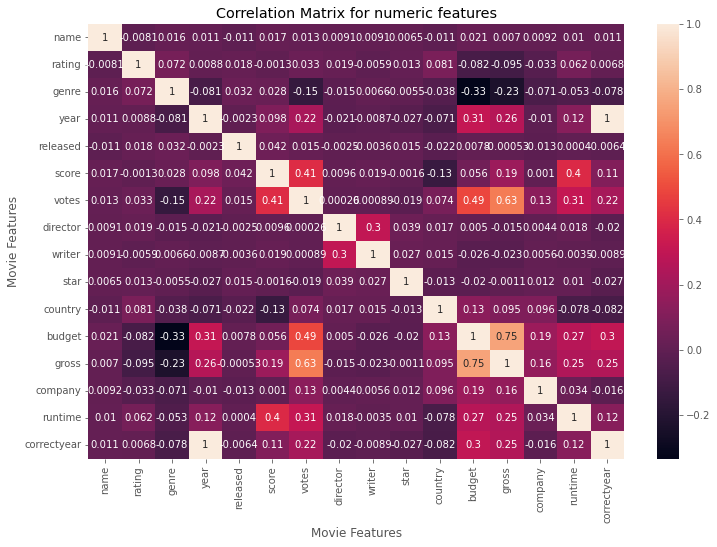

In [213]:
correlation_matrix=df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix for numeric features')
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [214]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
name,1.000000,-0.008069,0.016355,0.011453,-0.010504,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.010392,0.010886
rating,-0.008069,1.000000,0.072423,0.008779,0.018282,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.062145,0.006846
genre,0.016355,0.072423,1.000000,-0.081261,0.031944,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052711,-0.077559
year,0.011453,0.008779,-0.081261,1.000000,-0.002335,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.120811,0.996888
released,-0.010504,0.018282,0.031944,-0.002335,1.000000,0.042407,0.015192,-0.002487,-0.003562,0.014928,-0.022159,0.007823,-0.000526,-0.012678,0.000397,-0.006369
score,0.017097,-0.001314,0.027965,0.097995,0.042407,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.186392,0.001030,0.399451,0.106257
votes,0.013088,0.033225,-0.145307,0.222945,0.015192,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.486862,0.632834,0.133204,0.309212,0.218206
director,0.009079,0.019483,-0.015258,-0.020795,-0.002487,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017624,-0.020178
writer,0.009081,-0.005921,0.006567,-0.008656,-0.003562,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.003511,-0.008924
star,0.006472,0.013405,-0.005477,-0.027242,0.014928,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.010174,-0.027373


In [234]:
correlation_mat=df_numerized.corr()
corr_pairs=correlation_mat.unstack()
corr_pairs.head(50)

name    name           1.000000
        rating        -0.029234
        genre          0.010996
        year           0.025542
        released      -0.006270
        score          0.014450
        votes          0.012615
        director       0.015246
        writer         0.012880
        star          -0.006882
        country       -0.025490
        budget         0.023392
        gross          0.005639
        company        0.021697
        runtime        0.010850
        correctyear    0.025542
        yearcorrect    0.025542
rating  name          -0.029234
        rating         1.000000
        genre          0.147796
        year           0.019499
        released       0.018243
        score          0.065983
        votes          0.006031
        director       0.014656
        writer        -0.003149
        star           0.009196
        country        0.008230
        budget        -0.203946
        gross         -0.181906
        company       -0.092357
        

In [233]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs.head(50)

budget       genre         -0.334021
genre        budget        -0.334021
             gross         -0.234297
gross        genre         -0.234297
votes        genre         -0.145307
genre        votes         -0.145307
score        country       -0.133348
country      score         -0.133348
gross        rating        -0.095450
rating       gross         -0.095450
correctyear  country       -0.082273
country      correctyear   -0.082273
budget       rating        -0.081939
rating       budget        -0.081939
genre        year          -0.081261
year         genre         -0.081261
runtime      country       -0.078412
country      runtime       -0.078412
correctyear  genre         -0.077559
genre        correctyear   -0.077559
             company       -0.071067
company      genre         -0.071067
year         country       -0.070938
country      year          -0.070938
runtime      genre         -0.052711
genre        runtime       -0.052711
country      genre         -0.037615
g

In [217]:
high_corr=sorted_pairs[(sorted_pairs)>0.5]
high_corr

votes        gross          0.632834
gross        votes          0.632834
budget       gross          0.750157
gross        budget         0.750157
correctyear  year           0.996888
year         correctyear    0.996888
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
correctyear  correctyear    1.000000
dtype: float64

### Conclusion: Votes and Budget have the highest correlation with gross income, whereas company has little correlation